In [1]:
'''Check that the simulated kappa_gmf values are properly simulated, and also check them as a function of Z'''
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import h5py
import matplotlib.lines as mlines

from fancy.interfaces.uhecr import Uhecr
from fancy.interfaces.stan import uv_to_coord
from fancy.plotting import AllSkyMap

ptypes_list = ["p", "He", "N", "Si", "Fe"]
# ptypes_list = ["p", "He", "N"]
seed = 19990308

uhecr_file = "../data/UHECRdata.h5"
uhecr = Uhecr()

# read kappa_gmf values for each particle type

kappa_gmf_list = []
coord_gal_list = []
coord_rand_list = []

coord_true_list = []
kappa_gmf_rand_list = []

gmf_model = "JF12"
detector = "auger2014"

with h5py.File(uhecr_file, "r") as f:
    print(f.keys())

    detector_dict = f[detector]

    kappa_gmf_dict = detector_dict["kappa_gmf"]

    gmf_model_dict = kappa_gmf_dict[gmf_model]

    for ptype in ptypes_list:
        gmf_model_dict_ptype = gmf_model_dict[ptype]
        coord_true_list.append(gmf_model_dict_ptype["omega_true"][()])
        coord_rand_list.append(gmf_model_dict_ptype["omega_rand"][()])
        coord_gal_list.append(gmf_model_dict_ptype["omega_gal"][()])
        kappa_gmf_list.append(gmf_model_dict_ptype["kappa_gmf"][()])
        kappa_gmf_rand_list.append(gmf_model_dict_ptype["kappa_gmf_rand"][()])

    glon = detector_dict['glon'][()]
    glat = detector_dict['glat'][()]
    uhecr_coord = uhecr.get_coordinates(glon, glat)
# for ptype in ptypes_list:
#     sim_output_file = "../../output/{0}_sim_{1}_{2}_{3}_{4}.h5".format(
#         "joint_gmf", "SBG_23", "TA2015", seed, ptype)

#     with h5py.File(sim_output_file, "r") as f:
#         uhecr_coord_list.append(uv_to_coord(f["uhecr/unit_vector"][()]))

#         kappa_gmf_list.append(f["uhecr/kappa_gmf"][()])
#         coord_gmf_list.append(f["plotvars/omega_rand_kappa_gmf"][()])
#         coord_defl_list.append(f["plotvars/omega_defl_kappa_gmf"][()])
#         # print(f["uhecr"].keys(), type(uhecr_coord))

#         # kappa_gmf

len(kappa_gmf_list[0])

/Users/fran/.virtualenvs/fancy/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<KeysViewHDF5 ['TA2015', 'auger2010', 'auger2014']>


231

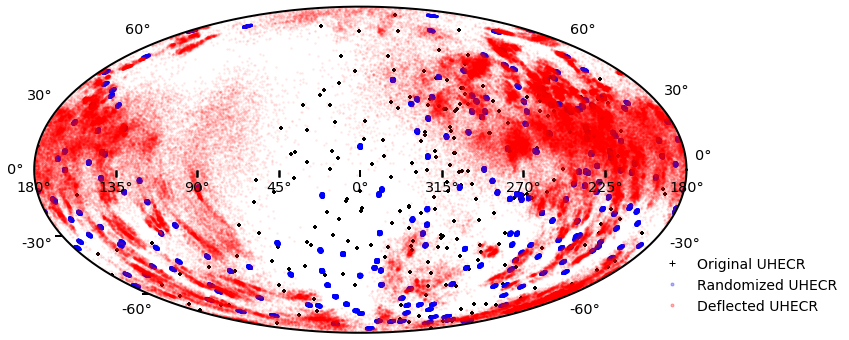

In [3]:
plt.style.use("minimalist")

skymap = AllSkyMap()
skymap.fig.set_size_inches(12, 6)
#skymap.set_gridlines(label_fmt="default")

ptype = "N"

ptype_idx = np.argwhere([p == ptype for p in ptypes_list])[0][0]
# print(ptype_idx)

skymap.scatter(np.rad2deg(coord_true_list[ptype_idx][:, 0]), np.rad2deg(coord_true_list[ptype_idx][:, 1]), color="k", alpha=1, marker="+", s=20.0)
skymap.scatter(np.rad2deg(coord_rand_list[ptype_idx][:, :, 0]), np.rad2deg(coord_rand_list[ptype_idx][:, :, 1]), color="b", alpha=0.1, s=5.0, lw=0)
skymap.scatter(np.rad2deg(coord_gal_list[ptype_idx][:, :, 0]), np.rad2deg(coord_gal_list[ptype_idx][:, :, 1]), color="r", alpha=0.1, s=5.0, lw=0)
# skymap.scatter(180. - 177.14668051, 49.59823616, color="g", marker="o", s=200)
# skymap.scatter(180. - uhecr_coord.galactic.l.deg, uhecr_coord.galactic.b.deg, color="purple", alpha=1, marker="+", s=50.0)

handles = [mlines.Line2D([], [], color='k', marker='+', lw=0,
                          markersize=6, alpha=1, label="Original UHECR"),
           mlines.Line2D([], [], color='b', marker='o', lw=0,
                          markersize=3, alpha=0.3, label="Randomized UHECR"),
            mlines.Line2D([], [], color='r', marker='o', lw=0,
                          markersize=3, alpha=0.3, label="Deflected UHECR")]

skymap.ax.legend(handles=handles, bbox_to_anchor=(1.25, 0.27), fontsize=14) 
# skymap.ax.title("Deflection skymap with data - {0}".format(ptype))
#skymap.fig.savefig(f"defl_skymap_{detector}_{ptype}_{gmf_model}.png")



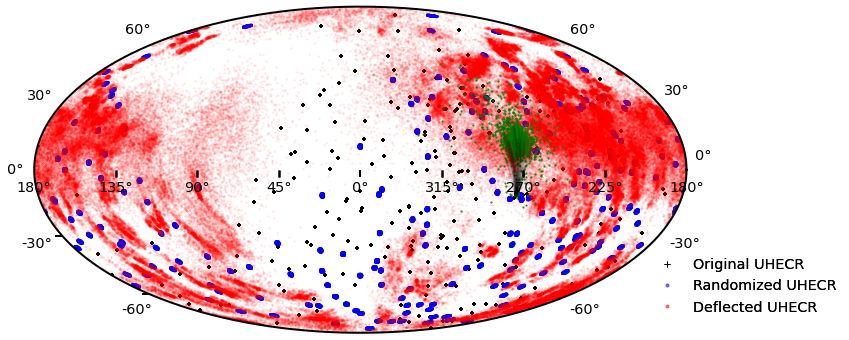

In [4]:
plt.style.use("minimalist")

skymap = AllSkyMap()
skymap.fig.set_size_inches(12, 6)
#skymap.set_gridlines(label_fmt="default", zorder=1)

# ptype = "p"
# for sel_uhecr_idx in np.arange(0, 72, 8):
# print(sel_uhecr_idx)

sel_uhecr_idx = 24
sel_uhecr_lon, sel_uhecr_lat = 180-np.rad2deg(coord_true_list[ptype_idx][sel_uhecr_idx, 0]), np.rad2deg(coord_true_list[ptype_idx][sel_uhecr_idx, 1])

ptype_idx = np.argwhere([p == ptype for p in ptypes_list])[0][0]
# print(ptype_idx)

skymap.scatter(np.rad2deg(coord_true_list[ptype_idx][:, 0]), np.rad2deg(coord_true_list[ptype_idx][:, 1]), color="k", alpha=1, marker="+", s=20.0)
skymap.scatter(np.rad2deg(coord_rand_list[ptype_idx][:, :, 0]), np.rad2deg(coord_rand_list[ptype_idx][:, :, 1]), color="b", alpha=0.1, s=5.0, lw=0)
skymap.scatter(np.rad2deg(coord_gal_list[ptype_idx][:, :, 0]), np.rad2deg(coord_gal_list[ptype_idx][:, :, 1]), color="r", alpha=0.1, s=5.0, lw=0)

# skymap.scatter(180. - uhecr_coord.galactic.l.deg, uhecr_coord.galactic.b.deg, color="purple", alpha=1, marker="+", s=50.0)

skymap.scatter(np.rad2deg(coord_rand_list[ptype_idx][sel_uhecr_idx, :, 0]), np.rad2deg(coord_rand_list[ptype_idx][sel_uhecr_idx, :, 1]), color="g", alpha=0.1, s=5.0, lw=0)
skymap.scatter(np.rad2deg(coord_gal_list[ptype_idx][sel_uhecr_idx, :, 0]), np.rad2deg(coord_gal_list[ptype_idx][sel_uhecr_idx, :, 1]), color="g", alpha=0.8, s=5.0, lw=0)

for i in range(100):
    skymap.geodesic(np.rad2deg(coord_rand_list[ptype_idx][sel_uhecr_idx, i, 0]), np.rad2deg(coord_rand_list[ptype_idx][sel_uhecr_idx, i, 1]), 
    np.rad2deg(coord_gal_list[ptype_idx][sel_uhecr_idx, i, 0]), np.rad2deg(coord_gal_list[ptype_idx][sel_uhecr_idx, i, 1]), alpha=0.05, color="k")

handles = [mlines.Line2D([], [], color='k', marker='+', lw=0,
                        markersize=6, alpha=1, label="Original UHECR"),
        mlines.Line2D([], [], color='b', marker='o', lw=0,
                        markersize=3, alpha=0.3, label="Randomized UHECR"),
            mlines.Line2D([], [], color='r', marker='o', lw=0,
                        markersize=3, alpha=0.3, label="Deflected UHECR")]

# sel_uhecr_handles = [mlines.Line2D([], [], color='g', marker='o', lw=0,
#                           markersize=4, alpha=0.3, label="UHECR Coordinate (Gal):\n ({0:.1f}$^\circ$, {1:.1f}$^\circ$)".format(sel_uhecr_lon, sel_uhecr_lat))]

legend1 = skymap.ax.legend(handles=handles, bbox_to_anchor=(1.25, 0.27)) 
# legend2 = skymap.ax.legend(handles=sel_uhecr_handles, bbox_to_anchor=(1.25, 1.05)) 

skymap.ax.add_artist(legend1)
# skymap.ax.add_artist(legend2)



# skymap.ax.title("Deflection skymap with data - {0}".format(ptype))
# skymap.fig.savefig("skymap_banana.png")



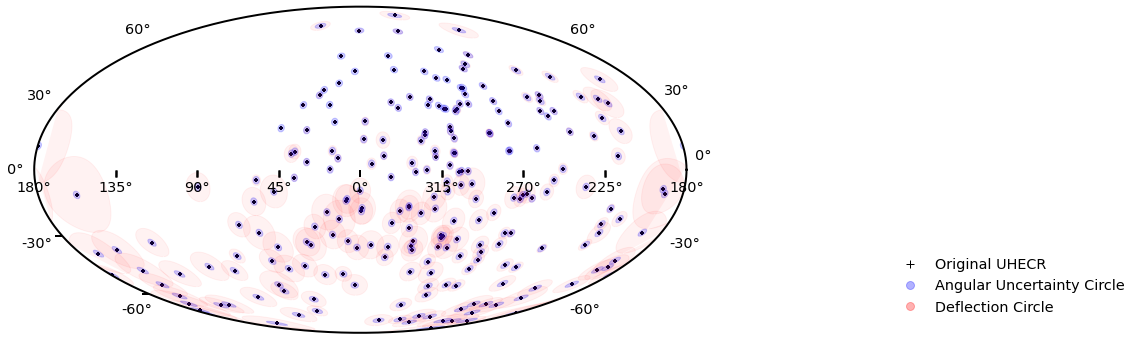

In [7]:
# evaluate dot product between deflected and randomized vector
# then obtain the effective thetea_rms for each (true) UHECR

from astropy.coordinates import SkyCoord
from astropy import units as u

from fancy.interfaces.stan import coord_to_uv
from scipy.optimize import root
ptype = "p"

'''Integral of Fischer distribution used to evaluate kappa_d'''
def fischer_int(kappa, cos_thetaP):
    '''Integral of vMF function over all angles'''
    return (1. - np.exp(-kappa * (1 - cos_thetaP))) / (1. - np.exp(-2.*kappa))

def fischer_int_eq_P(cos_thetaP, kappa, P):
    '''Equation to find roots for'''
    return fischer_int(kappa, cos_thetaP) - P

ptype_idx = np.argwhere([p == ptype for p in ptypes_list])[0][0]
# print(kappa_gmf_list[ptype_idx])

cos_theta_arr = np.zeros(len(kappa_gmf_list[ptype_idx]))
for i, kappa_gmf in enumerate(kappa_gmf_list[ptype_idx]):
    sol = root(fischer_int_eq_P, x0=1, args=(kappa_gmf, 0.683))
    cos_theta = sol.x[0]
    cos_theta_arr[i] = cos_theta

thetas = np.rad2deg(np.arccos(cos_theta_arr))
# print(np.rad2deg(np.arccos(cos_theta_arr)))

skymap = AllSkyMap()
skymap.fig.set_size_inches(12, 6)
#skymap.set_gridlines(label_fmt="default")

ang_err = 1.7
skymap.scatter(np.rad2deg(coord_true_list[ptype_idx][:, 0]), np.rad2deg(coord_true_list[ptype_idx][:, 1]), color="k", alpha=1, marker="+", s=10.0)

for i, (lon, lat) in enumerate(coord_true_list[ptype_idx][:]):
    skymap.tissot(np.rad2deg(lon), np.rad2deg(lat), ang_err, npts=30, 
                  color="b", alpha=0.2)
    skymap.tissot(np.rad2deg(lon), np.rad2deg(lat), thetas[i], npts=30, 
                  color="r", alpha=0.05)

handles = [mlines.Line2D([], [], color='k', marker='+', lw=0,
                          markersize=8, alpha=1, label="Original UHECR"),
           mlines.Line2D([], [], color='b', marker='o', lw=0,
                          markersize=8, alpha=0.3, label="Angular Uncertainty Circle"),
            mlines.Line2D([], [], color='r', marker='o', lw=0,
                          markersize=8, alpha=0.3, label="Deflection Circle")]

skymap.ax.legend(handles=handles, bbox_to_anchor=(1.3, 0.27)) 
# skymap.ax.title("Deflection skymap with data - {0}".format(ptype))

# skymap.scatter(np.rad2deg(coord_true_list[ptype_idx][:, 0]), np.rad2deg(coord_true_list[ptype_idx][:, 1]), color="k", alpha=1, marker="+", s=20.0)
# skymap.scatter(np.rad2deg(coord_rand_list[ptype_idx][:, :, 0]), np.rad2deg(coord_rand_list[ptype_idx][:, :, 1]), color="b", alpha=0.05, s=4.0)




<Figure size 504x360 with 0 Axes>

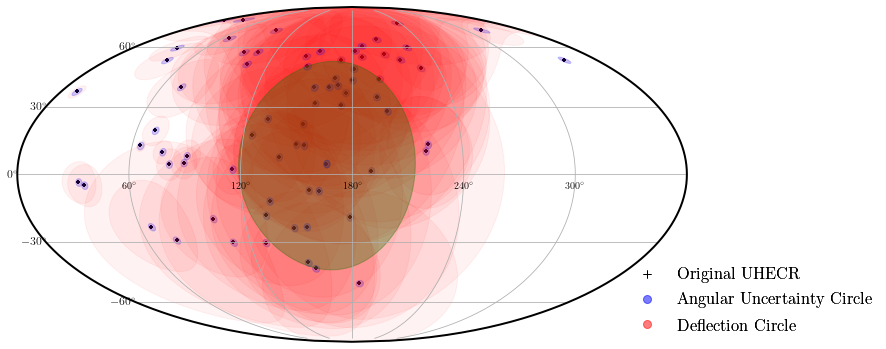

In [ ]:
# evaluate dot product between deflected and randomized vector
# then obtain the effective thetea_rms for each (true) UHECR

from astropy.coordinates import SkyCoord
from astropy import units as u

from fancy.interfaces.stan import coord_to_uv
from scipy.optimize import root
ptype = "N"

'''Integral of Fischer distribution used to evaluate kappa_d'''
def fischer_int(kappa, cos_thetaP):
    '''Integral of vMF function over all angles'''
    return (1. - np.exp(-kappa * (1 - cos_thetaP))) / (1. - np.exp(-2.*kappa))

def fischer_int_eq_P(cos_thetaP, kappa, P):
    '''Equation to find roots for'''
    return fischer_int(kappa, cos_thetaP) - P

ptype_idx = np.argwhere([p == ptype for p in ptypes_list])[0][0]
# print(kappa_gmf_list[ptype_idx])

cos_theta_arr = np.zeros(len(kappa_gmf_list[ptype_idx]))
for i, kappa_gmf in enumerate(kappa_gmf_list[ptype_idx]):
    sol = root(fischer_int_eq_P, x0=1, args=(kappa_gmf, 0.683))
    cos_theta = sol.x[0]
    cos_theta_arr[i] = cos_theta

thetas = np.rad2deg(np.arccos(cos_theta_arr))
# print(np.rad2deg(np.arccos(cos_theta_arr)))

skymap = AllSkyMap(lon_0 = 180)
skymap.set_gridlines(label_fmt="default")

ang_err = 1.7
skymap.scatter(np.rad2deg(coord_true_list[ptype_idx][:, 0]), np.rad2deg(coord_true_list[ptype_idx][:, 1]), color="k", alpha=1, marker="+", s=10.0)

for i, (lon, lat) in enumerate(coord_true_list[ptype_idx][:]):
    skymap.tissot(np.rad2deg(lon), np.rad2deg(lat), ang_err, color="b", alpha=0.2)
    skymap.tissot(np.rad2deg(lon), np.rad2deg(lat), thetas[i], color="r", alpha=0.05)

sel_uhecr_idx = 24
skymap.tissot(np.rad2deg(coord_true_list[ptype_idx][sel_uhecr_idx, 0]), np.rad2deg(coord_true_list[ptype_idx][sel_uhecr_idx, 1]), ang_err, color="b", alpha=0.2)
skymap.tissot(np.rad2deg(coord_true_list[ptype_idx][sel_uhecr_idx, 0]), np.rad2deg(coord_true_list[ptype_idx][sel_uhecr_idx, 1]), thetas[sel_uhecr_idx], color="g", alpha=0.3)

handles = [mlines.Line2D([], [], color='k', marker='+', lw=0,
                          markersize=8, alpha=1, label="Original UHECR"),
           mlines.Line2D([], [], color='b', marker='o', lw=0,
                          markersize=8, alpha=0.3, label="Angular Uncertainty Circle"),
            mlines.Line2D([], [], color='r', marker='o', lw=0,
                          markersize=8, alpha=0.3, label="Deflection Circle")]

# sel_uhecr_handles = [mlines.Line2D([], [], color='g', marker='o', lw=0,
#                           markersize=4, alpha=0.3, label="UHECR Coordinate (Gal):\n ({0:.1f}$^\circ$, {1:.1f}$^\circ$)\n".format(sel_uhecr_lon, sel_uhecr_lat))]

legend1 = skymap.legend(handles=handles, bbox_to_anchor=(1.3, 0.27)) 
# legend2 = skymap.legend(handles=sel_uhecr_handles, bbox_to_anchor=(0.9, 1.05)) 

skymap.ax.add_artist(legend1)
# skymap.ax.add_artist(legend2)

# skymap.title("Deflection skymap with data - {0}".format(ptype))

# skymap.save("GMFPlots_N_defl_circles_selUHECR.png")

# skymap.scatter(np.rad2deg(coord_true_list[ptype_idx][:, 0]), np.rad2deg(coord_true_list[ptype_idx][:, 1]), color="k", alpha=1, marker="+", s=20.0)
# skymap.scatter(np.rad2deg(coord_rand_list[ptype_idx][:, :, 0]), np.rad2deg(coord_rand_list[ptype_idx][:, :, 1]), color="b", alpha=0.05, s=4.0)




In [8]:
len(thetas)

# somehow the circles that cover all sky (fior N) disappeared, need to invesitagte why 

231

(array([0., 0., 3., 0., 0., 1., 2., 1., 1.]),
 array([1.000e-02, 1.112e+01, 2.223e+01, 3.334e+01, 4.445e+01, 5.556e+01,
        6.667e+01, 7.778e+01, 8.889e+01, 1.000e+02]),
 <BarContainer object of 9 artists>)

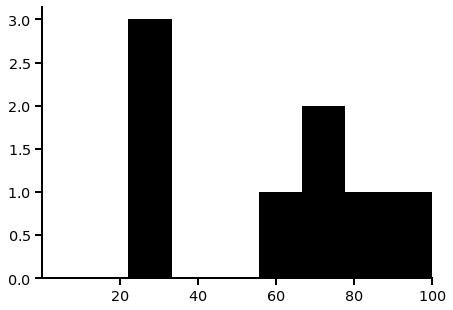

In [9]:
ptype_idx = np.argwhere([p == "p" for p in ptypes_list])[0][0]
# plt.hist(kappa_gmf_list[ptype_idx], bins=np.logspace(-2, 3, 10))
plt.hist(kappa_gmf_list[ptype_idx], bins=np.linspace(1e-2, 1e2, 10))
# plt.xscale("log")

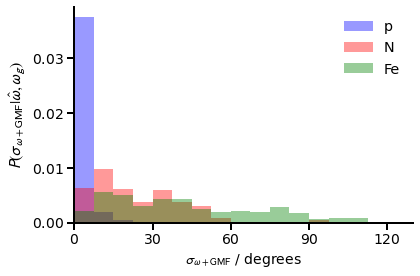

In [10]:
colors = ["b", "r", "g"]

fig, ax = plt.subplots(figsize=(6,4))
# plt.hist(kappa_gmf_list[ptype_idx], bins=np.logspace(-2, 3, 10))
for i, ptype in enumerate(["p", "N", "Fe"]):

    ptype_idx = np.argwhere([p == ptype for p in ptypes_list])[0][0]
    # print(kappa_gmf_list[ptype_idx])

    not_zero_idces = np.argwhere(kappa_gmf_list[ptype_idx] > 1e-9)

    cos_theta_arr = np.zeros_like(kappa_gmf_list[ptype_idx])
    for j, kappa_gmf in enumerate(kappa_gmf_list[ptype_idx]):
        if kappa_gmf < 1e-9:
            kappa_gmf = 0
        sol = root(fischer_int_eq_P, x0=1, args=(kappa_gmf, 0.683))
        cos_theta = sol.x[0]
        cos_theta_arr[j] = cos_theta

    thetas = np.rad2deg(np.arccos(cos_theta_arr))

    thetas = thetas[not_zero_idces]

    # print(thetas)

    ax.hist(thetas, bins=np.linspace(0, 180, 25), alpha=0.4, color=colors[i], label=ptype, weights=np.ones_like(thetas) / len(thetas) / 25)
#     plt.xscale("log")
ax.set_xlim([0, 130])
ax.set_xticks(np.arange(0, 130, 30, dtype=int))
ax.set_yticks([0, 0.01, 0.02, 0.03])
# for tick in ax.xaxis.get_major_ticks():
#     tick.label.set_fontsize(12)

# ax.set_yticklabels()
ax.legend()

ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
ax.set_xlabel(r"$\sigma_{{\omega + \rm{GMF}}}$ / degrees", fontsize=14)
ax.set_ylabel(r"$P (\sigma_{{\omega + \rm{GMF}}} | \hat{\omega}, \omega_{g})$", fontsize=16)

fig.tight_layout()

fig.savefig("kappa_defl_histogram.png", dpi=400)

#     plt.hist(kappa_gmf_rand_list[ptype_idx][sel_uhecr_idx, :], 
#             bins=np.logspace(-2, 2, 30), 
#             alpha=0.4, color=colors[i], label=ptype)
#     plt.xscale("log")

#     plt.legend()

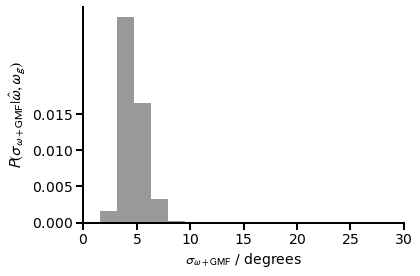

In [11]:
colors = ["k"]

fig, ax = plt.subplots(figsize=(6,4))
# plt.hist(kappa_gmf_list[ptype_idx], bins=np.logspace(-2, 3, 10))
for i, ptype in enumerate(["p"]):

    ptype_idx = np.argwhere([p == ptype for p in ptypes_list])[0][0]
    # print(kappa_gmf_list[ptype_idx])

    cos_theta_arr = np.zeros_like(kappa_gmf_rand_list[ptype_idx][sel_uhecr_idx, :])
    for j, kappa_gmf in enumerate(kappa_gmf_rand_list[ptype_idx][sel_uhecr_idx, :]):
        sol = root(fischer_int_eq_P, x0=1, args=(kappa_gmf, 0.683))
        cos_theta = sol.x[0]
        cos_theta_arr[j] = cos_theta

    thetas = np.rad2deg(np.arccos(cos_theta_arr))

    ax.hist(thetas, bins=np.linspace(0, 30, 20), alpha=0.4, color=colors[i], label=ptype, weights=np.ones_like(thetas) / len(thetas) / 20)
#     plt.xscale("log")
ax.set_xlim([0, 30])
ax.set_xticks(np.arange(0, 35, 5, dtype=int))
ax.set_yticks([0, 0.005, 0.01, 0.015])
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
# for tick in ax.xaxis.get_major_ticks():
#     tick.label.set_fontsize(12)

# ax.set_yticklabels()
# ax.legend()

ax.set_xlabel(r"$\sigma_{{\omega + \rm{GMF}}}$ / degrees", fontsize=14)
ax.set_ylabel(r"$P (\sigma_{{\omega + \rm{GMF}}} | \hat{\omega}, \omega_{g})$", fontsize=16)

fig.tight_layout()

fig.savefig(f"kappa_defl_{ptype}_histogram.png", dpi=400)